In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data=pd.read_csv('cs-training.csv')

In [3]:
training_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
training_data=training_data.drop(columns='Unnamed: 0')

In [7]:
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
length = len(training_data['SeriousDlqin2yrs'])
percentage_labels = (training_data['SeriousDlqin2yrs'].value_counts()/length)*100
percentage_labels

SeriousDlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64

outcome variable is imbalanced

In [11]:
training_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [14]:
training_data_ = training_data.fillna((training_data.mean()))

In [17]:

training_corr=training_data_[training_data_.columns[1:]].corr()

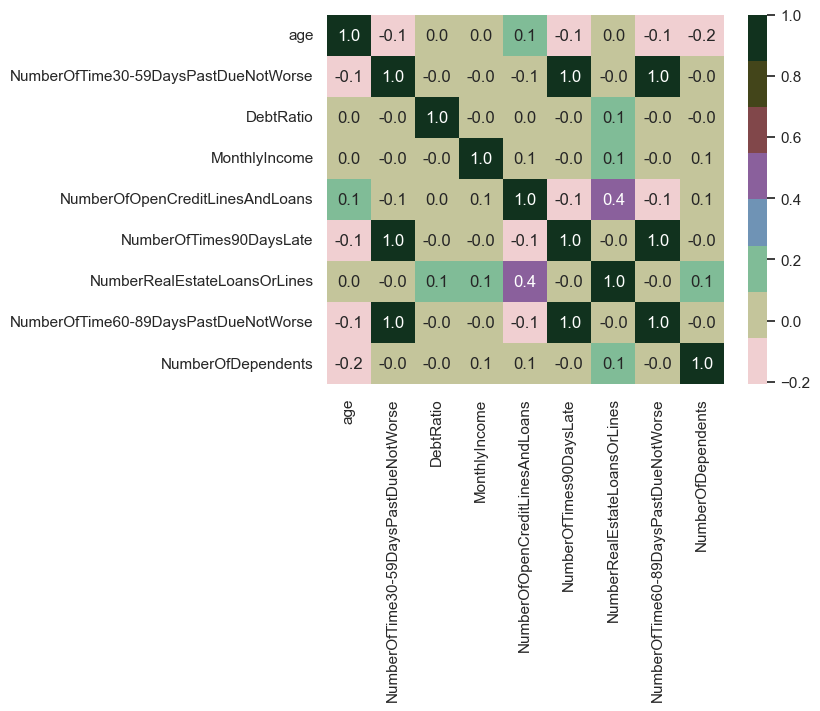

In [24]:
sns.set()
sns.heatmap(training_data_[training_corr.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=3, rot=-2)))
plt.show()

Detecting the outlier

In [25]:
#percentile based outlier detection
def percentile_outlier(data,thresh=95):
    diff=(100-thresh) / 2
    (min,max)=np.percentile(data,[diff,100-diff])
    return((data<min) | (data>max))

In [26]:
percentile_outlier(training_corr)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,True
NumberOfTime30-59DaysPastDueNotWorse,False,False,False,False,False,False,False,False,False,False
DebtRatio,False,False,False,False,False,False,False,False,False,False
MonthlyIncome,False,False,False,False,False,False,False,False,False,False
NumberOfOpenCreditLinesAndLoans,False,False,False,False,False,False,False,False,False,False
NumberOfTimes90DaysLate,False,False,False,False,False,False,False,False,False,False
NumberRealEstateLoansOrLines,False,False,False,False,False,False,False,False,False,False
NumberOfTime60-89DaysPastDueNotWorse,False,False,False,False,False,False,False,False,False,False
NumberOfDependents,False,True,False,False,False,False,False,False,False,False


In [68]:
#median based outlier
def mad_based_outlier(points,thresh=3.5):
    if len(points.shape)==1:
        points = points.reshape(-1, 1)
    median_y=np.median(points)
    median_absolute_deviation_y=np.median(np.abs(y*median_y) for y in points)
    modified_z_scores=[0.6745*(y-median_y)/median_absolute_deviation_y for y in points]

    return np.abs(modified_z_scores)

In [69]:
def std_div(data,thresh=3):
    std=data.std()
    mean=data.mean()
    Outlier=[]
    for val in data:
        if val/std>thresh:
            Outlier.append(True)
        else:
            Outlier.append(False)
    return Outlier

In [70]:
def outliervote(data):
    x=percentile_outlier
    y=mad_based_outlier
    z=std_div
    temp=zip(data.index,x,y,z)
    final=[]
    for i in range(len(temp)):
        if temp[i].count(False)>=2:
            final.append(False)
        else:
            final.append(True)
        return final




In [71]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_outlier, mad_based_outlier, std_div, outliervote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig.set_size_inches(15, 10)
    plt.show()


In [78]:
data=training_data['RevolvingUtilizationOfUnsecuredLines'].sample(2000)


In [79]:
data

120391    0.134610
133851    0.348215
133896    0.275789
15419     0.017266
130777    0.031923
            ...   
109364    0.010422
138968    0.663463
67732     0.073846
11138     0.799712
114090    0.114315
Name: RevolvingUtilizationOfUnsecuredLines, Length: 2000, dtype: float64

In [83]:
from sklearn.ensemble import RandomForestClassifier

training_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [87]:
X=training_data_.drop('SeriousDlqin2yrs',axis=1)

In [88]:
y=training_data.SeriousDlqin2yrs
features_label=training_data.columns[1:]
forest=RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1)
forest.fit(X,y)

RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=0)

In [90]:
importances=forest.feature_importances_

In [93]:
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print("%2d %s %f" % (i+1, features_label[i], importances[indices[i]]))

 1 RevolvingUtilizationOfUnsecuredLines 0.193226
 2 age 0.179208
 3 NumberOfTime30-59DaysPastDueNotWorse 0.145886
 4 DebtRatio 0.127456
 5 MonthlyIncome 0.090787
 6 NumberOfOpenCreditLinesAndLoans 0.088382
 7 NumberOfTimes90DaysLate 0.049255
 8 NumberRealEstateLoansOrLines 0.047835
 9 NumberOfTime60-89DaysPastDueNotWorse 0.044163
10 NumberOfDependents 0.033802


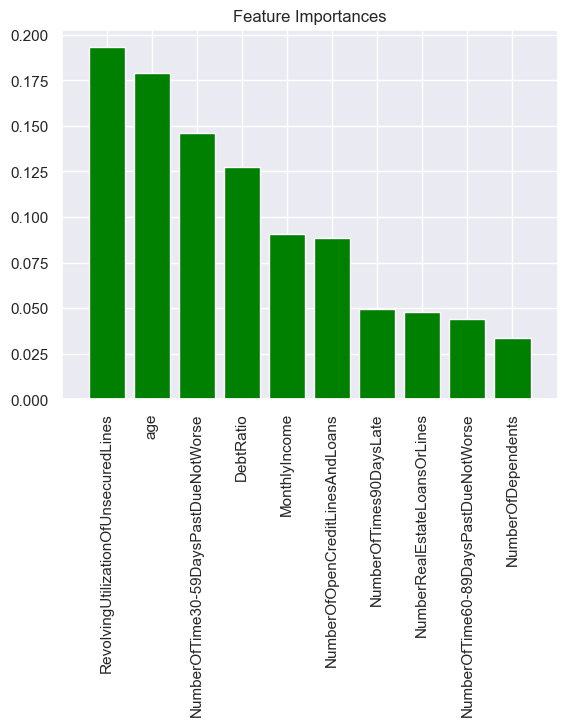

In [94]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],color='green',align='center')
plt.xticks(range(X.shape[1]),features_label,rotation=90)
plt.xlim([-1,X.shape[1]])
plt.show()